In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
from matplotlib import pyplot as plt
import os

random.seed(123)

In [3]:
rootdir = '/lustre/groups/ml01/workspace/anastasia.litinetskaya/experiments/integration/trimodal/sites/'

In [4]:
results = {}

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith("metrics.csv"):
            n_features = subdir.split('/')[-1].split('-')[0]
            name = filepath.split('/')[-1][:-12]
            df = pd.read_csv(filepath)
            df = df.set_index('Unnamed: 0')
            if name not in results:
                results[name] = {}
            results[name][n_features] = df['0']['overall']

In [5]:
df = pd.DataFrame(results)
df = df.sort_index()
df

,reference_CITE-seq_query,reference_snRNA-seq_query,train,reference_ATAC-seq_query,reference_query,reference_scRNA-seq_query,reference_multiome_query
site123_4,0.747717,0.743667,0.759303,0.747575,0.753552,0.759151,0.751158
site12_34,0.751948,0.746152,0.756733,0.725599,0.746766,0.747760,0.755571
site1_234,0.734352,0.741032,0.748821,0.714134,0.742384,0.730188,0.733694


In [6]:
df = df[['train', 
         'reference_CITE-seq_query', 
         'reference_multiome_query', 
         'reference_scRNA-seq_query', 
         'reference_ATAC-seq_query',
         'reference_snRNA-seq_query']]

In [7]:
df = df.rename(columns={
    'reference_CITE-seq_query': 'CITE-seq mapping', 
    'reference_snRNA-seq_query': 'snRNA-seq mapping', 
    'train': 'reference building',
    'reference_ATAC-seq_query': 'ATAC-seq mapping', 
    'reference_scRNA-seq_query': 'scRNA-seq mapping', 
    'reference_multiome_query': 'multiome mapping'
})

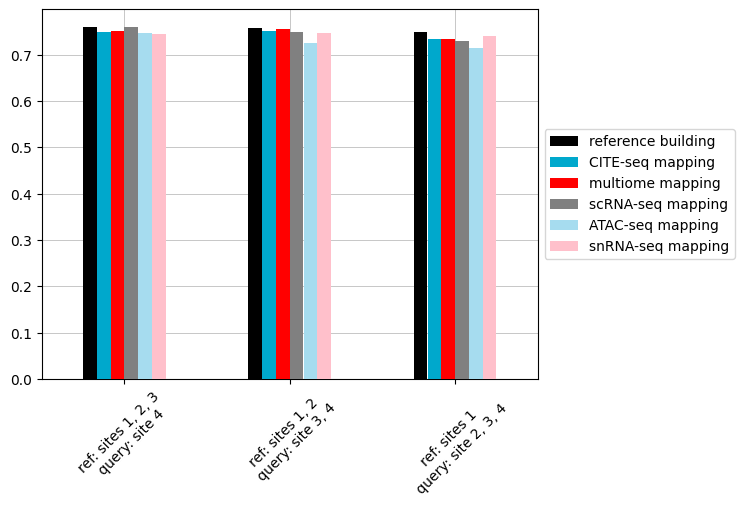

In [8]:
ax = df.plot(kind='bar', rot=45, zorder=3, color=["black", "#00a8cc", "red",  "gray", "#a6dcef", "#FFC0CB"])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels([
    'ref: sites 1, 2, 3\n query: site 4', 
    'ref: sites 1, 2\n query: site 3, 4',
    'ref: sites 1\n query: site 2, 3, 4'
])
ax.grid(zorder=0, linewidth=0.5)
plt.savefig('figures/robustness_ref_query_size.svg', bbox_inches='tight')